<a href="https://colab.research.google.com/github/adityas1998/LIF-Spectra-classification/blob/master/LIF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LIF Specta Analysis and classification**

## **Importing the required libraries**

In [0]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize
import tensorflow as tf
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

## **Preparing the DataFrames**

In [0]:
#Getting links to all file paths
def datasets():
    path = os.curdir
    files = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(path):
        for file in f:
            if '.txt' in file:
                files.append(os.path.join(r, file))
    return files

In [0]:
#making dataframes out of all the given datasets for ease of access
def gen_data_frame():
    main_df=pd.DataFrame()
    label_dict={}
    frames=[]
    files=datasets()
    count=0
    for i in files:
        count+=1
        file=open(i,'r')
        filename=i.split("-")[7]
        data=file.read()
        data_manipulation_step1=data.split("\n")
        data_manipulation_step2=[i.split("\t") for i in data_manipulation_step1]
        df=pd.DataFrame(data_manipulation_step2[0:len(data_manipulation_step2)-1],columns=['A','B','C','D','E','F','G','H'])
        df['id']=count
        frames.append(df)  
        label_dict[count]=filename
    main_df=pd.concat(frames)
    return (main_df,frames,label_dict)

In [4]:
#creating instances of the dataframe/s
df,sub_dfs,lab=gen_data_frame()
lab

{1: 'MixWaterSugar',
 2: 'Water',
 3: 'Petrol50Diesel50',
 4: 'Kerosene',
 5: 'Urea',
 6: 'Petrol25Diesel75',
 7: 'Petrol'}

In [5]:
# #checking sub frames
df.head()

,A,B,C,D,E,F,G,H,id
0,248.998,0.000,0.000,1466.000,1464.000,1464.000,1457.000,1457.000,1
1,249.042,-0.000,-0.005,674.000,701.000,701.000,1457.000,1457.000,1
2,249.086,-0.000,-0.013,731.000,695.000,695.000,664.000,664.000,1
3,249.130,-0.000,-0.011,691.000,690.000,690.000,696.000,696.000,1
4,249.173,-0.001,0.005,1151.000,1137.000,1137.000,1140.000,1140.000,1


## **Preprocessing(Normalizing) the data**

In [0]:
#processing the data to make it suitable for using it as an input for the machine learning algorithm
train=[]
for df_ in sub_dfs:
  feature=np.array(df_['C'])
  train.append(feature)

labels=np.array([1,2,3,4,5,6,7])


In [0]:
def custom_normalizer(test_input,flag="train"):
  test_input=np.array(list(map(float,test_input)))
  test_input=test_input-test_input.mean()
  test_input=test_input/test_input.max()
  if flag=="test":
    test_input=test_input.reshape(1,-1)
  return test_input


In [0]:
normalized_input=[]
for train_input in train:
  normalized=custom_normalizer(train_input)
  normalized_input.append(np.array(normalized))

In [9]:
normalized_input[3]

array([-0.35855583, -0.35855131, -0.35855008, ..., -0.35789128,
       -0.3578576 , -0.35782351])

## **LIF Plots**

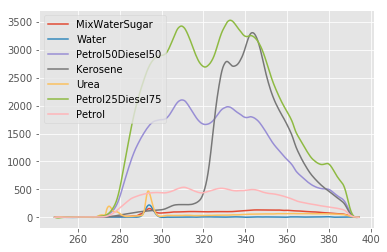

In [10]:
substance=[]
for train_input in train:
  sub=np.array(list(map(float,train_input)))
  substance.append(np.array(sub))
# print(substance)
from matplotlib import style
style.use('ggplot')
x=np.array(list(map(float,sub_dfs[0]['A'])))
plt.plot(x,substance[0],label=lab[1])
plt.plot(x,substance[1],label=lab[2])
plt.plot(x,substance[2],label=lab[3])
plt.plot(x,substance[3],label=lab[4])
plt.plot(x,substance[4],label=lab[5])
plt.plot(x,substance[5],label=lab[6])
plt.plot(x,substance[6],label=lab[7])
plt.legend()

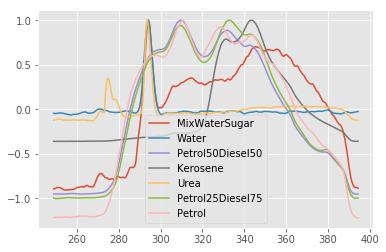

In [92]:
#Plotting all the spectrums 
style.use('ggplot')
plt.plot(x,normalized_input[0],label=lab[1])
plt.plot(x,normalized_input[1],label=lab[2])
plt.plot(x,normalized_input[2],label=lab[3])
plt.plot(x,normalized_input[3],label=lab[4])
plt.plot(x,normalized_input[4],label=lab[5])
plt.plot(x,normalized_input[5],label=lab[6])
plt.plot(x,normalized_input[6],label=lab[7])
plt.legend()

## **T1: SVM**

In [0]:
#SVM classifier with one label
from sklearn.svm import SVC

labels_=labels.reshape(-1,1)
model=SVC()


model.fit(normalized_input,labels_)

In [91]:
import random
testcase=random.randint(1,7)
print("testcase:",testcase)
test=sub_dfs[testcase-1]['B']
test=custom_normalizer(test,"test")
predicted_label=model.predict(test)

print("Actual label:",lab[testcase])
print("Predicted label:",lab[predicted_label.item()])
# print(testcase)
# print(predicted_label.item())

testcase: 5
Actual label: Urea
Predicted label: Urea


## **T2: KNN**